<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/An%C3%A1lise_dos_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Dublin*

<center><img alt="Dublin" width="75%" src="https://raw.githubusercontent.com/JoaoGustavo29/Relatorios/main/trinity-college-405783_1920.jpg?token=ASR654YSKWJUE3QNA3XRXWLADSZBS"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados usados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Como esta é apenas uma análise exploratória inicial, será baixado um arquivo resumido:

* `listings.csv` - *Summary information and metrics for listings in Dublin (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2020-12-17/visualisations/listings.csv')

## Análise dos Dados

Nesta etapa o objetivo é garantir um entendimento de como os dados estão estruturados, de forma que o leitor tenha consciência do que será analisado.

**Dicionário das variáveis**

* `id` - número de indentificação do imóvel
* `name` - Título do anúncio da propriedade
* `host_id` - número de indentificação do proprietário 
* `host_name` - nome do anfitrião
* `neighbourhood_group` - coluna sem valores válidos
* `neighbourhood` - nome do  bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedae
* `room_type` - tipo de acomodação oferecida
* `price` - valor do aluguel
* `minimum_nights` - menor quantidade de noites para alugar
* `number_of_reviews` - número de reviews
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews em um mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de partirmos para as análises, vamos conhecer um pouco do nosso *dataset*, dando uma olhada nas 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,1.91,3,0
1,68483,Unique Central Dublin River-view,339817,John,NaN,Dublin City,53.34501,-6.26552,Entire home/apt,92,3,103,2019-08-12,0.87,1,43
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.05,1,348
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,51,3,182,2020-03-09,1.56,3,114
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.95,3,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 7894
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quando buscamos um *dataset* queremos um com qualidade, é possível mensurar isso de acordo com a quantidade de valores ausentes. É nescessário entender se os valores nulos são significativos comparados ao total de entradas.

* Na coluna `neighbourhood_group` é possível vermos que 100% dos seus valores estão faltando 
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 20% de valores nulos.
* A variável `name`possui cerca de 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) 

neighbourhood_group               1.000000
reviews_per_month                 0.193311
last_review                       0.193311
name                              0.000127
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

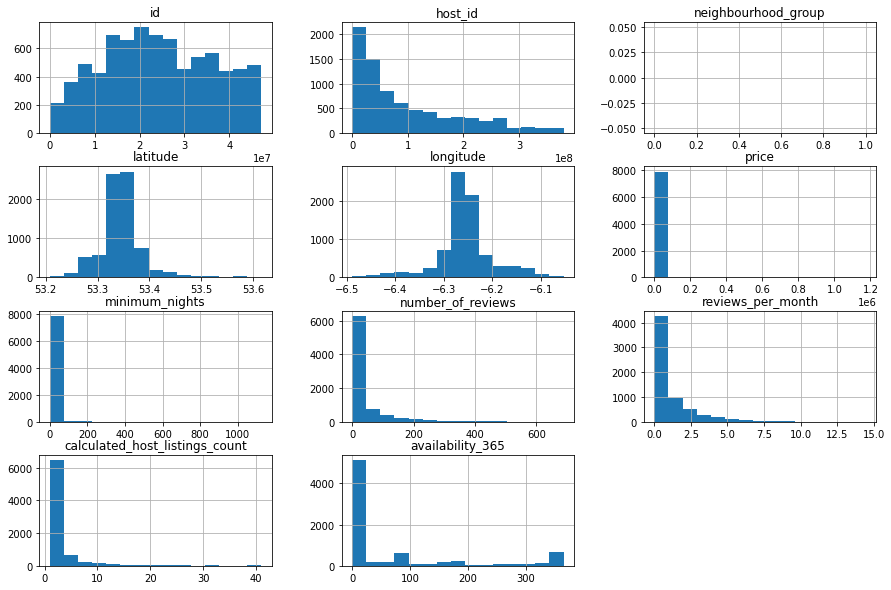

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Em uma análise onde temos o valor do aluguel, o interesse em saber a média desse valor surge. A fim de tirar *insights* que auxiliam no cálculo do gasto com a acomodação, numa possível viagem.

* É possível verificar que o valor *médio* do aluguel das acomodações é **`274,95 euros`**.

In [ ]:
# ver a média da coluna `price`
df['price'].mean()

274.9541423866228

### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No contexto da análise, podemos buscar relação ou semelhança entre duas variáveis.

Essas relações podem ser medidas, e é função do coeficiente de relação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.000714,-0.006137,0.042889,-0.003264,-0.005857
minimum_nights,-0.000714,1.000000,-0.003731,-0.009205,0.016837,0.034398
number_of_reviews,-0.006137,-0.003731,1.000000,0.869775,-0.007239,0.113662
reviews_per_month,0.042889,-0.009205,0.869775,1.000000,0.055643,0.147990
calculated_host_listings_count,-0.003264,0.016837,-0.007239,0.055643,1.000000,0.183880
availability_365,-0.005857,0.034398,0.113662,0.147990,0.183880,1.000000


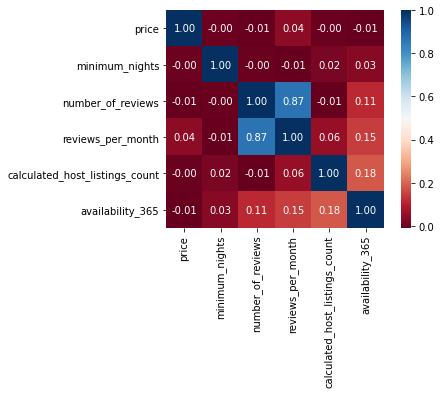

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu' , fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type`indica qual tipo de imóvel está anunciado na plataforma. No site, existem opções de apartamentos/casas inteiras, aluguel de um quarto privado ou até mesmo dividir os mesmo quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Private room       3970
Entire home/apt    3709
Shared room         140
Hotel room           75
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Private room       0.502914
Entire home/apt    0.469851
Shared room        0.017735
Hotel room         0.009501
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Dublin?**

É possível verificar uma variável em função de outra, usando `groupby()`. Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço do aluguel.



Acima, podemos ver que os bairros South Dublin, Fingal e Dn Laoghaire-Rathdown, possuem uma média de preços inferior a de Dublin City, talvez por estar no centro e não mais afastado, como Fingal.

Não sou um conhecedor da cidade de Dublin então não posso falar com propriedade o motivo dessa classificação das médias, mas é possível verificarmos que o local onde há mais imóveis é Dublin City. Essa enorme diferença em relação ao número de imóveis em outros bairros, pode ser o motivo da classificação das médias.


In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dublin City              329.318947
Dn Laoghaire-Rathdown    112.315854
Fingal                   100.250000
South Dublin              83.358255
Name: price, dtype: float64

In [ ]:
# definindo variáveis para ver a quantidade de imóveis de cada região

dct = df[df.neighbourhood == 'Dublin City'].shape[0]

dlr = df[df.neighbourhood == 'Dn Laoghaire-Rathdown'].shape[0]

fng = df[df.neighbourhood == 'Fingal'].shape[0]

sd = df[df.neighbourhood == 'South Dublin'].shape[0]

# Imprimindo o número de imóveis em cada região
print('O número de imóveis em Dublin City é :\t {}'.format(dct))

print('O número de imóveis em Dn Laoghaire-Rathdown é :\t {}'.format(dlr))

print('O número de imóveis em Fingal é :\t {}'.format(fng))

print('O número de imóveis em South Dublin é :\t {}'.format(sd))

O número de imóveis em Dublin City é :	 6001
O número de imóveis em Dn Laoghaire-Rathdown é :	 820
O número de imóveis em Fingal é :	 752
O número de imóveis em South Dublin é :	 321


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

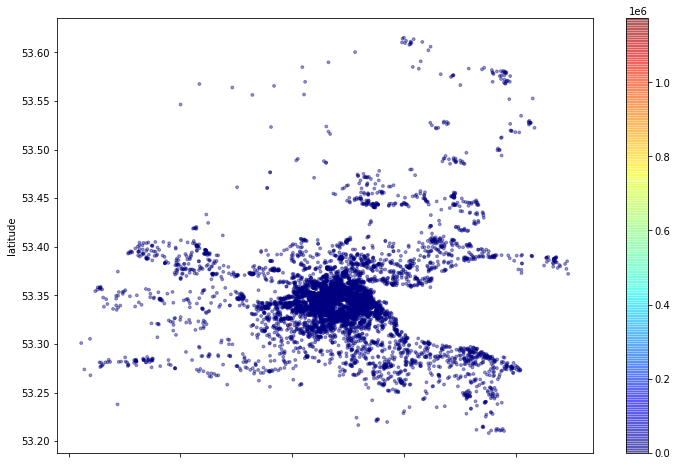

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos ver que a média do mínimo de noites é próxima de 5, mostrando que os proprietários tendem a não disponibilizar os imóveis por curtos períodos de tempo (1 ou 2 dias).

In [ ]:
# ver a média da coluna `minimum_nights`

df['minimum_nights'].mean()

4.953635672662782

## Conclusões

Neste projeto, conseguimos tirar algumas informações sobre o **Airbnb** na cidade de Dublin.

Se considerarmos que uma pessoa trabalha 20 horas semanais na Irlanda, ela chega ao final do mês com 800 euros, ganhando um salário minímo, isso mostra que a hospedagem em dublin é relativamente cara. Pois, a média de preço é de `274,95` euros. 

Algumas outras informações:

* Cerca de 50% dos anúncios são de `private Rooms`.
* A média de preços mais cara é a de `Dublin City`.
* O local com menos imóveis disponíveis é `South Dublin`.
* A média de `minimum_nights` é aproximadamente 5 noites.